In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
parks = pd.read_csv("parks.csv")
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [5]:
q = parks['type'] == "Park"
parks = parks[q]
parks

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,821363109,Winters Park,Park,Parks - Southern,NaN,South Side Slopes,3,17,42003170600,3,17,3,4-3,40.422667,-79.981445
204,1460363095,Woods Run Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.476383,-80.029253
205,930068146,Young Field Park,Park,Parks - Northern,NaN,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.472963,-80.032768
206,1127012019,Zulema Park,Park,Parks - Schenley,NaN,Central Oakland,3,4,42003040500,3,4,4,2-14,40.435693,-79.957048


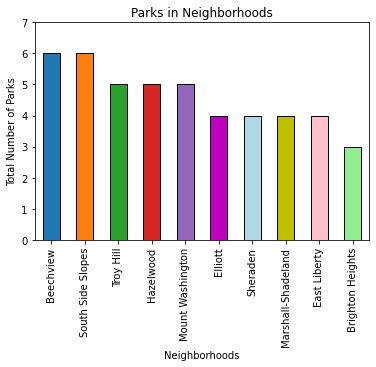

In [6]:
parks_dict = {}

for _, row in parks.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood in parks_dict:
        parks_dict[neighborhood] +=1
    else:
        parks_dict[neighborhood] = 1

parks_series = pd.Series(parks_dict, name = "neighborhoods")
parks_series = parks_series.sort_values(ascending=False)

parks_series[:10].plot(kind = "bar", title = "Parks in Neighborhoods", xlabel = "Neighborhoods",
                       ylabel = "Total Number of Parks", ylim = [0,7], linewidth = 1,
                       edgecolor = "black", color=['C0', 'C1', 'C2', 'C3', 'C4', 'm', 'lightblue', 'y', 'pink', 'lightgreen'])